In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder
import sklearn
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import os

In [40]:
df_pca = pd.read_csv("componentes_pca.csv")
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.730145,2.902740,3.466206,3.089480,5.778977,-4.770941,-0.704717,0.498619,-0.768987,1.623952
1,5.214533,4.420837,-0.304757,0.576945,4.028668,-3.989763,2.221145,-1.776959,0.233144,-2.994313
2,6.827113,-2.596645,4.463616,0.956746,4.007421,-7.420173,-1.792980,0.728080,-0.019304,1.572013
3,2.073856,0.479447,3.396508,2.857976,5.180949,-5.725671,0.094725,0.162521,0.466770,1.402212
4,-0.952218,-1.048936,1.002979,-0.884729,5.575894,-4.269575,1.883823,-0.973628,2.399547,-0.786030
...,...,...,...,...,...,...,...,...,...,...
22576,8.028386,-1.703401,-2.047045,-2.140302,-1.239016,-1.724602,1.878729,-0.878163,-2.569781,3.251192
22577,3.274952,-2.272160,1.805229,-2.371135,-0.078923,-1.231948,0.901064,-2.424293,-0.824852,1.871995
22578,7.477231,-4.845899,2.847632,0.050801,-1.111650,-1.834608,2.552797,-1.467517,-1.931352,1.306028
22579,2.790292,1.396947,0.428649,-1.318851,0.268847,1.398509,1.928949,-2.368165,-0.411287,0.046524


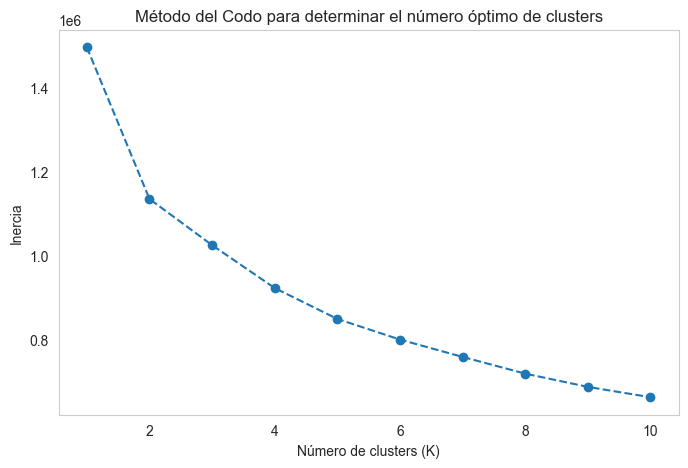

Centroides de los clusters:
[[ 6.13165753  0.8225693   0.07471789  0.05009663  0.06308092 -0.15491479
   0.10357994 -0.05190214  0.03228497  0.04381877]
 [-1.30561303 -2.38266695  0.19691864 -0.28375632  0.46223837  0.32672473
   0.05108753  0.28069623 -0.07148276 -0.0179299 ]
 [-3.95048973  2.10105457 -0.30179733  0.2932038  -0.60756654 -0.25028279
  -0.15390908 -0.28793519  0.0562026  -0.01798209]]

Asignación de clusters a las primeras filas:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.730145  2.902740  3.466206  3.089480  5.778977 -4.770941 -0.704717   
1  5.214533  4.420837 -0.304757  0.576945  4.028668 -3.989763  2.221145   
2  6.827113 -2.596645  4.463616  0.956746  4.007421 -7.420173 -1.792980   
3  2.073856  0.479447  3.396508  2.857976  5.180949 -5.725671  0.094725   
4 -0.952218 -1.048936  1.002979 -0.884729  5.575894 -4.269575  1.883823   

        PC8       PC9      PC10  Cluster  
0  0.498619 -0.768987  1.623952        2  
1 -1.776959  

In [41]:
# 1. Determino el numero óptimo de clusters usando el método del codo 
inertia = []  # Lista para almacenar la inercia (suma de distancias al centroide)
K_range = range(1, 11)  # Probar entre 1 y 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# 2. Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.grid()
plt.show()

# 3. Ajustar KMeans con el número óptimo de clusters
# Basándonos en el gráfico del codo, selecciona el número óptimo (por ejemplo, K=3)
n_clusters = 3  # Ajusta según el gráfico del codo
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

# 4. Mostrar los resultados
print("Centroides de los clusters:")
print(kmeans.cluster_centers_)

print("\nAsignación de clusters a las primeras filas:")
print(df_pca.head())

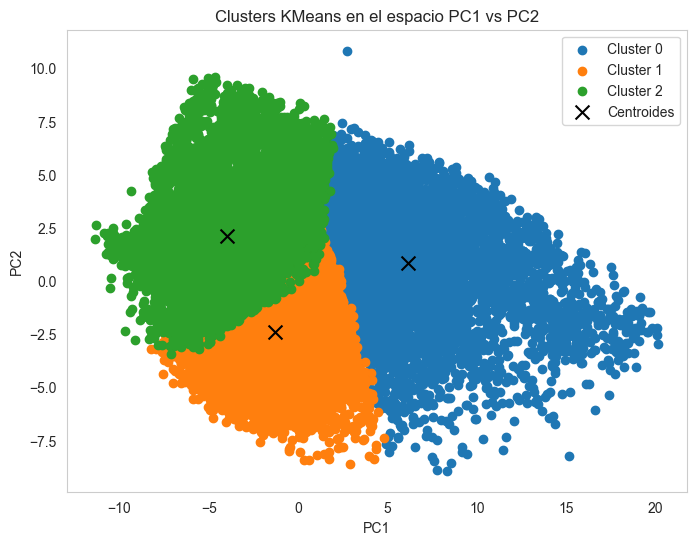

In [42]:
# Visualización de clusters usando PC1 y PC2
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    plt.scatter(df_pca[df_pca['Cluster'] == cluster]['PC1'], 
                df_pca[df_pca['Cluster'] == cluster]['PC2'],
                label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='black', marker='x', s=100, label='Centroides')
plt.title('Clusters KMeans en el espacio PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()

### Proyecto las componentes principales de vuelta a las variables originales usando inverse_transform de PCA

In [44]:
# 1. Cargo las variables originales desde el CSV
ruta_csv_original = 'imputacion_normal_categoricas.csv'  # Ruta a tu archivo original
df_original = pd.read_csv(ruta_csv_original)

# 2. Estandarizo las variables originales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_original)

# 3. Aplico PCA a los datos estandarizados
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# 4. Proyecto de vuelta a las dimensiones originales 
X_reconstructed = pca.inverse_transform(df_pca.drop('Cluster', axis=1))

# 5. Revierto la estandarización para volver a la escala original
X_reconstructed_original = scaler.inverse_transform(X_reconstructed)

# 6. Creo un DataFrame con los datos reconstruidos
df_reconstructed = pd.DataFrame(X_reconstructed_original, columns=df_original.columns)

# Añaddo la asignación de clusters
df_reconstructed['Cluster'] = df_pca['Cluster']

# 7. Calculo estadísticas descriptivas por cluster
cluster_summary = df_reconstructed.groupby('Cluster').mean()


# Guardar la configuración actual de pandas
previous_max_rows = pd.get_option('display.max_rows')
previous_max_columns = pd.get_option('display.max_columns')

# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Mostrar el DataFrame completo
print("Resumen de las variables originales por cluster:")
print(cluster_summary)

# Restaurar la configuración original
pd.set_option('display.max_rows', previous_max_rows)
pd.set_option('display.max_columns', previous_max_columns)

print("\nConfiguración de pandas restaurada.")


Resumen de las variables originales por cluster:
         esg_score21  esg_class21  environ_score21  environ_class21  \
Cluster                                                               
0           1.024793     0.791300         1.003003         0.635231   
1          -0.105207    -0.210496        -0.282548        -0.175941   
2          -0.797073    -0.461502        -0.566228        -0.362188   

         social_score21  social_class21  govern_score21  govern_class21  \
Cluster                                                                   
0              0.905021        0.707714        0.778376        0.647299   
1             -0.047143       -0.138171        0.092516        0.136705   
2             -0.758429       -0.472416       -0.810788       -0.745443   

         turnover21  firm_age  group_size  size_class  other_acount  \
Cluster                                                               
0          0.807599  0.139265   -0.045825    0.722785      0.187827   
1     

In [45]:
# Crear una carpeta para guardar los gráficos si no existe
output_folder = "graficos_clusters"
os.makedirs(output_folder, exist_ok=True)

# Función para crear y guardar el gráfico de radar
def plot_and_save_radar(cluster_name, cluster_data):
    labels = list(cluster_data.keys())
    values = list(cluster_data.values())
    values += values[:1]  # Repetir el primer valor para cerrar el círculo
    
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='lightblue', alpha=0.4)
    ax.plot(angles, values, color='blue', linewidth=2)
    
    ax.set_yticklabels([])  # Ocultar valores de radio
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10, weight='bold')
    plt.title(f'{cluster_name}', size=14, weight='bold', pad=20)
    plt.tight_layout()
    
    # Guardar el gráfico
    output_path = os.path.join(output_folder, f"{cluster_name.replace(' ', '_')}.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close()  # Cerrar la figura para liberar memoria
    print(f"Gráfico guardado: {output_path}")

# Generar y guardar gráficos de radar para cada cluster
clusters_data = {
    'Empresas Líderes (Cluster 0)': {
        'esg_score21': 0.92, 'environ_score21': 0.89, 'social_score21': 0.81, 'govern_score21': 0.71,
        'net_income21': 0.38, 'ebitda21': 0.44, 'gross_profit': 0.63, 'total_assets21': 0.78,
        'equity21': 0.64, 'employees21': 0.59
    },
    'Empresas Rezagadas (Cluster 1)': {
        'esg_score21': -0.57, 'environ_score21': -0.46, 'social_score21': -0.52, 'govern_score21': -0.62,
        'net_income21': -0.14, 'ebitda21': -0.25, 'gross_profit': -0.06, 'total_assets21': -0.27,
        'equity21': -0.19, 'employees21': -0.26
    },
    'Empresas en Transición (Cluster 2)': {
        'esg_score21': -0.01, 'environ_score21': -0.30, 'social_score21': 0.08, 'govern_score21': 0.71,
        'net_income21': -0.34, 'ebitda21': -0.07, 'gross_profit': -1.22, 'total_assets21': -0.77,
        'equity21': -0.73, 'employees21': -0.39
    }
}

# Generar y guardar gráficos
for cluster, data in clusters_data.items():
    plot_and_save_radar(cluster, data)


Gráfico guardado: graficos_clusters\Empresas_Líderes_(Cluster_0).png
Gráfico guardado: graficos_clusters\Empresas_Rezagadas_(Cluster_1).png
Gráfico guardado: graficos_clusters\Empresas_en_Transición_(Cluster_2).png


In [46]:
# Configuración del estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Crear el gráfico de barras
ax = cluster_summary[variables_clave].T.plot(kind='bar', width=0.8)

# Personalizar el gráfico
plt.title('Comparación de Puntajes ESG entre Clusters', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Valor Medio', fontsize=12, fontweight='bold')
plt.xlabel('Variables ESG', fontsize=12, fontweight='bold')
plt.legend(title='Cluster', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=0, ha='center', fontsize=10)

# Añadir valores en las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

# Ajustar los márgenes y mostrar el gráfico
plt.tight_layout()
plt.show()

NameError: name 'variables_clave' is not defined

<Figure size 1200x700 with 0 Axes>

Cluster 0 (Verde):

Puntajes altos en todas las dimensiones ESG: environ_score21, social_score21 y govern_score21.
Representa a empresas líderes con buenas prácticas en sostenibilidad y gobernanza.
Cluster 1 (Naranja):

Puntajes negativos en todas las dimensiones ESG.
Estas empresas presentan desafíos significativos en términos medioambientales, sociales y de gobernanza.
Cluster 2 (Azul):

Puntaje positivo en governance (govern_score21), indicando fortalezas en gobernanza.
Puntajes negativos moderados en las dimensiones ambiental y social.
Representa empresas en transición, con oportunidades de mejora en aspectos ambientales y sociales.

## Sectores predominantes por clusters

In [ ]:
# Data preparation
data = {
    'Cluster': ['Cluster 0', 'Cluster 1', 'Cluster 2'],
    'Retail': [0.10, 0.40, 0.15],
    'Utilities': [0.35, 0.10, 0.20],
    'Construction': [0.20, 0.10, 0.30],
    'Manufacturing': [0.15, 0.25, 0.20],
    'Technology': [0.20, 0.15, 0.15]
}
sector_data = pd.DataFrame(data).set_index('Cluster')

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
colors = sns.color_palette('pastel')

for i, cluster in enumerate(sector_data.index):
    axes[i].pie(sector_data.loc[cluster], labels=sector_data.columns, autopct='%1.1f%%',
                startangle=140, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
                textprops={'fontsize': 10, 'fontweight': 'bold'})
    axes[i].set_title(f'{cluster}', fontsize=14, fontweight='bold', pad=20)

# Adjust layout and add title
plt.suptitle('Sector Distribution by Cluster', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()

# Add a legend
fig.legend(sector_data.columns, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.05),
           fontsize=10, frameon=False)

plt.show()


## Relación entre ESG Score y Rentabilidad por Cluster

In [ ]:
# Graficar ESG (esg_score21) vs Rentabilidad (net_income21)
plt.figure(figsize=(8, 6))
colors = {0: 'green', 1: 'red', 2: 'orange'}  # Colores por cluster

for cluster in [0, 1, 2]:
    subset = df_reconstructed[df_reconstructed['Cluster'] == cluster]
    plt.scatter(subset['esg_score21'], subset['net_income21'], 
                label=f'Cluster {cluster}', color=colors[cluster])

plt.title('Relación entre ESG Score y Rentabilidad por Cluster')
plt.xlabel('Puntaje ESG (esg_score21)')
plt.ylabel('Rentabilidad (net_income21)')
plt.axhline(0, color='gray', linestyle='--')  # Línea de referencia en y = 0
plt.axvline(0, color='gray', linestyle='--')  # Línea de referencia en x = 0
plt.legend()
plt.grid()
plt.show()

Cluster 0 (Verde): Alto ESG Score y Rentabilidad Positiva
Ubicación: Extremo derecho del gráfico, con valores positivos en ESG Score y una tendencia general hacia rentabilidad positiva.
Características:
Empresas con buen desempeño en ESG (valores altos en el eje X).
Muchas de estas empresas tienen rentabilidad positiva (parte superior del gráfico).
Refuerza la hipótesis de que un alto puntaje ESG está correlacionado con un buen desempeño financiero.

Cluster 1 (Rojo): Bajo ESG Score y Rentabilidad Negativa
Ubicación: Extremo izquierdo del gráfico, con valores negativos en ESG Score y rentabilidad negativa.
Características:
Empresas con bajo desempeño ESG (valores negativos en el eje X).
Tienden a presentar pérdidas financieras (parte inferior del gráfico, eje Y negativo).
Estas empresas se consideran rezagadas tanto en ESG como en rentabilidad, representando un área de oportunidad para mejoras.

Cluster 2 (Naranja): Puntajes Intermedios en ESG y Rentabilidad
Ubicación: Región central del gráfico, con puntajes ESG cercanos a cero y rentabilidades mixtas.
Características:
Empresas con puntajes ESG intermedios, indicando un desempeño moderado en aspectos medioambientales, sociales y de gobernanza.
Rentabilidad variable: algunas empresas tienen valores positivos, mientras que otras presentan valores negativos.
Representa empresas en transición, donde pequeñas mejoras en ESG podrían impulsar un mejor desempeño financiero.